In [255]:
import pandas as pd
import numpy as np

In [256]:
x = pd.read_csv('houses_to_rent_v2.csv')
x

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [257]:
x['floor'] = x['floor'].str.replace('-','0')
x['floor'] = x['floor'].astype('int64')
x

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [258]:
x.rename(columns={'hoa (R$)': 'hoa', 'rent amount (R$)': 'rent amount', 'property tax (R$)' : 'property tax', 'fire insurance (R$)' : 'fire insurance', 'total (R$)' : 'total'}, inplace=True)
x

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [259]:
condition = x['total'] > x['total'].mean()
condition

0         True
1         True
2        False
3        False
4        False
         ...  
10687    False
10688     True
10689     True
10690     True
10691    False
Name: total, Length: 10692, dtype: bool

In [260]:
x['How much?'] = condition

In [261]:
d = {'acept' : True, 'not acept' : False }
x = x.replace({'animal' : d})
x.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,How much?
0,São Paulo,70,2,1,1,7,True,furnished,2065,3300,211,42,5618,True
1,São Paulo,320,4,4,0,20,True,not furnished,1200,4960,1750,63,7973,True
2,Porto Alegre,80,1,1,1,6,True,not furnished,1000,2800,0,41,3841,False
3,Porto Alegre,51,2,1,0,2,True,not furnished,270,1112,22,17,1421,False
4,São Paulo,25,1,1,0,1,False,not furnished,0,800,25,11,836,False


In [262]:
d = {'furnished' : True, 'not furnished' : False }
x = x.replace({'furniture' : d})
x.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,How much?
0,São Paulo,70,2,1,1,7,True,True,2065,3300,211,42,5618,True
1,São Paulo,320,4,4,0,20,True,False,1200,4960,1750,63,7973,True
2,Porto Alegre,80,1,1,1,6,True,False,1000,2800,0,41,3841,False
3,Porto Alegre,51,2,1,0,2,True,False,270,1112,22,17,1421,False
4,São Paulo,25,1,1,0,1,False,False,0,800,25,11,836,False


In [263]:
x['animal'] = x['animal'].astype('int64')
x['furniture'] = x['furniture'].astype('int64')
x['How much?'] = x['How much?'].astype('int64')

In [264]:
x

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,How much?
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618,1
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973,1
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841,0
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421,0
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,0,1,402,1478,24,22,1926,0
10688,São Paulo,285,4,4,4,17,1,0,3100,15000,973,191,19260,1
10689,Rio de Janeiro,70,3,3,0,8,0,1,980,6000,332,78,7390,1
10690,Rio de Janeiro,120,2,2,2,8,1,1,1585,12000,279,155,14020,1


In [265]:
x = x.drop(['city'], axis=1)

In [266]:
x

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,How much?
0,70,2,1,1,7,1,1,2065,3300,211,42,5618,1
1,320,4,4,0,20,1,0,1200,4960,1750,63,7973,1
2,80,1,1,1,6,1,0,1000,2800,0,41,3841,0
3,51,2,1,0,2,1,0,270,1112,22,17,1421,0
4,25,1,1,0,1,0,0,0,800,25,11,836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,0,1,402,1478,24,22,1926,0
10688,285,4,4,4,17,1,0,3100,15000,973,191,19260,1
10689,70,3,3,0,8,0,1,980,6000,332,78,7390,1
10690,120,2,2,2,8,1,1,1585,12000,279,155,14020,1


In [267]:
# create two sets for working with classification and regression problems

In [268]:
df_for_class = x.drop(['How much?'], axis=1)

In [269]:
df_for_class = df_for_class.drop(['total'], axis=1)

In [270]:
arr_for_class_X = np.array(df_for_class)

In [271]:
arr_for_class_Y = np.array(x['How much?'])

In [272]:
arr_for_class_X

array([[   70,     2,     1, ...,  3300,   211,    42],
       [  320,     4,     4, ...,  4960,  1750,    63],
       [   80,     1,     1, ...,  2800,     0,    41],
       ...,
       [   70,     3,     3, ...,  6000,   332,    78],
       [  120,     2,     2, ..., 12000,   279,   155],
       [   80,     2,     1, ...,  1400,   165,    22]], dtype=int64)

In [273]:
arr_for_class_Y

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [274]:
df_for_reg = x.drop(['How much?'], axis=1)

In [275]:
df_for_reg = df_for_reg.drop(['total'], axis=1)

In [276]:
arr_for_reg_X = np.array(df_for_reg)

In [277]:
arr_for_reg_Y = np.array(x['total'])

In [278]:
arr_for_reg_X

array([[   70,     2,     1, ...,  3300,   211,    42],
       [  320,     4,     4, ...,  4960,  1750,    63],
       [   80,     1,     1, ...,  2800,     0,    41],
       ...,
       [   70,     3,     3, ...,  6000,   332,    78],
       [  120,     2,     2, ..., 12000,   279,   155],
       [   80,     2,     1, ...,  1400,   165,    22]], dtype=int64)

In [279]:
arr_for_reg_Y

array([ 5618,  7973,  3841, ...,  7390, 14020,  1587], dtype=int64)

In [280]:
#normalize all data for working with methods

In [281]:
from sklearn.preprocessing import StandardScaler 

In [282]:
StandardScaler().fit_transform(arr_for_class_X)

array([[-0.14752165, -0.432099  , -0.87895963, ..., -0.17493534,
        -0.05010297, -0.23658936],
       [ 0.31803478,  1.27553453,  1.25303592, ...,  0.31209868,
         0.44512065,  0.20305577],
       [-0.12889939, -1.28591577, -0.87895963, ..., -0.32163234,
        -0.11799913, -0.25752484],
       ...,
       [-0.14752165,  0.42171777,  0.54237074, ...,  0.61722843,
        -0.01116726,  0.51708801],
       [-0.05441036, -0.432099  , -0.16829445, ...,  2.37759236,
        -0.02822175,  2.12912015],
       [-0.12889939, -0.432099  , -0.87895963, ..., -0.73238392,
        -0.06490498, -0.655299  ]])

In [283]:
arr_for_class_X = (arr_for_class_X - arr_for_class_X.mean()) / arr_for_class_X.std()

In [284]:
arr_for_class_X

array([[-0.08820649, -0.10172131, -0.10192006, ...,  0.55374748,
        -0.06018311, -0.09377142],
       [-0.03851965, -0.10132382, -0.10132382, ...,  0.88366809,
         0.24568907, -0.08959772],
       [-0.08621902, -0.10192006, -0.10192006, ...,  0.4543738 ,
        -0.10211881, -0.09397016],
       ...,
       [-0.08820649, -0.10152256, -0.10152256, ...,  1.09036534,
        -0.03613468, -0.08661651],
       [-0.07826912, -0.10172131, -0.10172131, ...,  2.28284949,
        -0.04666829, -0.07131297],
       [-0.08621902, -0.10172131, -0.10192006, ...,  0.1761275 ,
        -0.06932549, -0.09774636]])

In [285]:
StandardScaler().fit_transform(arr_for_reg_X)

array([[-0.14752165, -0.432099  , -0.87895963, ..., -0.17493534,
        -0.05010297, -0.23658936],
       [ 0.31803478,  1.27553453,  1.25303592, ...,  0.31209868,
         0.44512065,  0.20305577],
       [-0.12889939, -1.28591577, -0.87895963, ..., -0.32163234,
        -0.11799913, -0.25752484],
       ...,
       [-0.14752165,  0.42171777,  0.54237074, ...,  0.61722843,
        -0.01116726,  0.51708801],
       [-0.05441036, -0.432099  , -0.16829445, ...,  2.37759236,
        -0.02822175,  2.12912015],
       [-0.12889939, -0.432099  , -0.87895963, ..., -0.73238392,
        -0.06490498, -0.655299  ]])

In [286]:
arr_for_reg_X = (arr_for_reg_X - arr_for_reg_X.mean()) / arr_for_reg_X.std()

In [287]:
arr_for_reg_X

array([[-0.08820649, -0.10172131, -0.10192006, ...,  0.55374748,
        -0.06018311, -0.09377142],
       [-0.03851965, -0.10132382, -0.10132382, ...,  0.88366809,
         0.24568907, -0.08959772],
       [-0.08621902, -0.10192006, -0.10192006, ...,  0.4543738 ,
        -0.10211881, -0.09397016],
       ...,
       [-0.08820649, -0.10152256, -0.10152256, ...,  1.09036534,
        -0.03613468, -0.08661651],
       [-0.07826912, -0.10172131, -0.10172131, ...,  2.28284949,
        -0.04666829, -0.07131297],
       [-0.08621902, -0.10172131, -0.10192006, ...,  0.1761275 ,
        -0.06932549, -0.09774636]])

In [288]:
#arr_for_class_Y = arr_for_class_Y.reshape(-1, 1).astype(np.float64)

In [289]:
#StandardScaler().fit_transform(arr_for_class_Y)

In [290]:
#arr_for_class_Y = (arr_for_class_Y - arr_for_class_Y.mean()) / arr_for_class_Y.std()

In [291]:
#arr_for_class_Y

In [292]:
arr_for_reg_Y = arr_for_reg_Y.reshape(-1, 1).astype(np.float64)

In [293]:
StandardScaler().fit_transform(arr_for_reg_Y)

array([[ 0.00773558],
       [ 0.15060178],
       [-0.10006622],
       ...,
       [ 0.11523406],
       [ 0.51744336],
       [-0.23680524]])

In [294]:
arr_for_reg_Y = (arr_for_reg_Y - arr_for_reg_Y.mean()) / arr_for_reg_Y.std()

In [295]:
arr_for_reg_Y

array([[ 0.00773558],
       [ 0.15060178],
       [-0.10006622],
       ...,
       [ 0.11523406],
       [ 0.51744336],
       [-0.23680524]])

In [296]:
# divide all the data into two sets of training and test for classification and regression

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(arr_for_class_X, arr_for_class_Y, test_size=0.33, random_state=42)

In [299]:
x_class_train

array([[-0.09257893, -0.10172131, -0.10192006, ...,  0.22581433,
        -0.09198269, -0.09794511],
       [-0.08264157, -0.10172131, -0.10172131, ...,  0.59349695,
        -0.05740065, -0.09297643],
       [-0.04646955, -0.10132382, -0.10092632, ...,  0.85186851,
         0.19600223, -0.08999522],
       ...,
       [-0.08224407, -0.10172131, -0.10172131, ...,  0.83199378,
        -0.02758855, -0.08999522],
       [-0.0915852 , -0.10192006, -0.10192006, ...,  0.41462433,
        -0.10211881, -0.09556014],
       [-0.07628165, -0.10172131, -0.10132382, ...,  0.43449906,
        -0.02043364, -0.09516265]])

In [300]:
x_class_test

array([[-0.07548666, -0.10152256, -0.10152256, ...,  0.39474959,
        -0.06694052, -0.09575889],
       [-0.08621902, -0.10172131, -0.10192006, ...,  0.27550117,
        -0.09218144, -0.09715012],
       [-0.08621902, -0.10172131, -0.10172131, ...,  0.29537591,
        -0.0953614 , -0.09695138],
       ...,
       [-0.07171046, -0.10132382, -0.10152256, ...,  0.43648653,
        -0.07807038, -0.09377142],
       [-0.05243197, -0.10152256, -0.10152256, ...,  1.18973902,
        -0.04070587, -0.08264157],
       [-0.0949639 , -0.10192006, -0.10192006, ...,  0.21587697,
        -0.09615639, -0.09794511]])

In [301]:
y_class_train

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [302]:
y_class_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [303]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(arr_for_reg_X, arr_for_reg_Y, test_size=0.33, random_state=42)

In [304]:
# let's work with the decision tree
from sklearn import tree

In [305]:
clf = tree.DecisionTreeClassifier()

In [306]:
clf = clf.fit(x_class_train, y_class_train)

[Text(210.3596590909091, 206.56799999999998, 'X[8] <= 0.694\ngini = 0.436\nsamples = 7163\nvalue = [4865, 2298]'),
 Text(121.4284090909091, 184.824, 'X[7] <= 0.22\ngini = 0.091\nsamples = 4902\nvalue = [4667, 235]'),
 Text(70.38409090909092, 163.07999999999998, 'X[8] <= 0.665\ngini = 0.02\nsamples = 4587\nvalue = [4540, 47]'),
 Text(44.38636363636364, 141.336, 'X[9] <= 0.272\ngini = 0.005\nsamples = 4428\nvalue = [4417, 11]'),
 Text(27.900000000000002, 119.592, 'X[9] <= -0.002\ngini = 0.003\nsamples = 4422\nvalue = [4416, 6]'),
 Text(10.145454545454546, 97.848, 'X[8] <= 0.651\ngini = 0.0\nsamples = 4363\nvalue = [4362, 1]'),
 Text(5.072727272727273, 76.10399999999998, 'gini = 0.0\nsamples = 4311\nvalue = [4311, 0]'),
 Text(15.218181818181819, 76.10399999999998, 'X[7] <= 0.186\ngini = 0.038\nsamples = 52\nvalue = [51, 1]'),
 Text(10.145454545454546, 54.360000000000014, 'gini = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(20.290909090909093, 54.360000000000014, 'gini = 0.0\nsamples = 1\nv

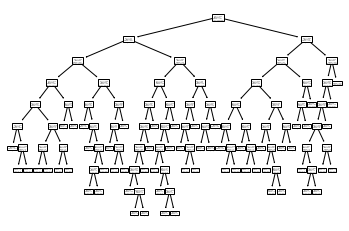

In [307]:
tree.plot_tree(clf)

In [309]:
ans_tree = clf.predict(x_class_test)
ans_tree

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [314]:
# accuracy metric (share of correct answers)
from sklearn.metrics import accuracy_score

In [315]:
acc_tree = accuracy_score(y_class_test, ans_tree)
acc_tree

0.9897988098611504

In [316]:
# work with logistic regression
from sklearn.linear_model import LogisticRegression

In [317]:
clf = LogisticRegression(random_state=0)

In [318]:
clf.fit(x_class_train, y_class_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [319]:
ans_log_r = clf.predict(x_class_test)

In [321]:
acc_log_r = accuracy_score(y_class_test, ans_log_r)
acc_log_r

0.9903655426466421

In [322]:
# working with kNN
from sklearn.neighbors import KNeighborsClassifier

In [323]:
clf = KNeighborsClassifier(n_neighbors=5)

In [324]:
clf.fit(x_class_train, y_class_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [325]:
ans_kNN = clf.predict(x_class_test)

In [327]:
acc_kNN = accuracy_score(y_class_test, ans_kNN)
acc_kNN

0.9940493057523377

In [347]:
# working with Linear Reg
from sklearn.linear_model import LinearRegression

In [348]:
clf = LinearRegression()

In [349]:
clf.fit(x_reg_train, y_reg_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [350]:
ans_lin_r = clf.predict(x_reg_test)
ans_lin_r

array([[-0.10807379],
       [-0.17322718],
       [-0.15593174],
       ...,
       [-0.15878882],
       [ 0.10111214],
       [-0.21198552]])

In [352]:
clf.coef_

array([[ 7.96510918e-06, -3.97047133e-02,  1.75146205e-03,
         8.03570175e-03, -3.36212183e-03,  5.68306457e-02,
        -4.29598643e-02,  3.05267001e-01,  3.05248651e-01,
         3.05215228e-01,  3.05071062e-01]])

In [353]:
# MSE Regression Model Evaluation Metric
from sklearn.metrics import mean_squared_error

In [354]:
MSE_lin_r = mean_squared_error(y_reg_test, ans_lin_r)
MSE_lin_r

9.797088855672605e-08

In [361]:
# working with random forest
from sklearn.ensemble import RandomForestClassifier

In [362]:
clf = RandomForestClassifier(n_estimators=10)

In [363]:
clf = clf.fit(x_class_train, y_class_train)

In [373]:
ans_rand_for = clf.predict(x_class_test)

In [376]:
acc_rand_for = accuracy_score(y_class_test, ans_rand_for)
acc_rand_for

0.9892320770756589

In [377]:
# work Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [379]:
clf = GradientBoostingClassifier(n_estimators=50)

In [380]:
clf.fit(x_class_train, y_class_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [381]:
ans_GBR = clf.predict(x_class_test)

In [382]:
acc_GBR = accuracy_score(y_class_test, ans_GBR)
acc_GBR

0.9912156418248795

In [408]:
a = (acc_tree, acc_log_r, acc_kNN, MSE_lin_r, acc_rand_for, acc_GBR)
a = list(a)
a

[0.9897988098611504,
 0.9903655426466421,
 0.9940493057523377,
 9.797088855672605e-08,
 0.9892320770756589,
 0.9912156418248795]

In [417]:
newS = pd.Series([0.9897988098611504, 0.9903655426466421, 0.9940493057523377, 9.797088855672605e-08, 0.9892320770756589, 0.9912156418248795], ['acc_tree', 'acc_log_r', 'acc_kNN', 'MSE_lin_r', 'acc_rand_for', 'acc_GBR'])

In [418]:
newS

acc_tree        9.897988e-01
acc_log_r       9.903655e-01
acc_kNN         9.940493e-01
MSE_lin_r       9.797089e-08
acc_rand_for    9.892321e-01
acc_GBR         9.912156e-01
dtype: float64

In [423]:
newS.sort_values(ascending=False)

acc_kNN         9.940493e-01
acc_GBR         9.912156e-01
acc_log_r       9.903655e-01
acc_tree        9.897988e-01
acc_rand_for    9.892321e-01
MSE_lin_r       9.797089e-08
dtype: float64

In [ ]:
# as you can see, the kNN method proved to be the best
# the metric of this method is closest to the rest 1